# Google Analytics Revenue Prediction

## Feature Engineering and Feature Selection

**Environment**

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df4.csv", low_memory=False)

### DF OPTION 1

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue,newRevenueDoll,newConversion,newIsOrganic,newChannel,newBrowser,newOS,geoDomainTerm,newAdContent,newAdCampaign,newAdKeyword,newReferralPath,newSourceTraffic
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Windows,tr,NoAd,NoCampaign,NoKeyword,NoReferral,Google
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,firefox,Macintosh,au,NoAd,NoCampaign,NoKeyword,NoReferral,Google
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Windows,Unknown,NoAd,NoCampaign,NoKeyword,NoReferral,Google
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google,0.0,0.0,False,1,organic,other,other,Unknown,NoAd,NoCampaign,Google,NoReferral,Google
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,0.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0,0.0,False,1,organic,chrome,Android,Unknown,NoAd,NoCampaign,NoKeyword,NoReferral,Google


#### FEATURE SELECTION

I still have 44 columns, but I will select the most important features for the 1st selection

In [5]:
df.shape

(903455, 43)

In [6]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitNumber',
       'visitStartTime', 'deviceBrowser', 'deviceCategory', 'deviceIsMobile',
       'deviceOS', 'geoCity', 'geoContinent', 'geoCountry', 'geoMetro',
       'geoDomain', 'geoRegion', 'geoSubContinent', 'totalsBounces',
       'totalsNewVisits', 'totalsPageviews', 'trafficSourceAdContent',
       'adwordsClickAdNetworkType', 'adwordsClickGclId',
       'adwordsClickInfoPage', 'adwordsClickInfoSlot', 'trafficSourceCampaign',
       'trafficSourceIsTrueDirect', 'trafficSourceKeyword',
       'trafficSourceMedium', 'trafficSourceReferralPath',
       'trafficSourceSource', 'totalsTransactionRevenue', 'newRevenueDoll',
       'newConversion', 'newIsOrganic', 'newChannel', 'newBrowser', 'newOS',
       'geoDomainTerm', 'newAdContent', 'newAdCampaign', 'newAdKeyword',
       'newReferralPath', 'newSourceTraffic'],
      dtype='object')

**SELECTION:**<br>
    Channel: 'newChannel'<br>
    Visit Number: 'visitNumber'<br>
    Browser: 'newBrowser'<br>
    Device Category: 'deviceCategory'<br>
    Is mobile: 'deviceIsMobile'<br>
    Device OS: 'newOS'<br>
    Geographical: 'geoContinent'<br>
    Bounce: 'totalsBounces'<br>
    New Visits: 'totalsNewVisits'<br>
    Pageviews: 'totalsPageviews'<br>
    Adcontent: 'newAdContent'<br>
    Ad Network: 'adwordsClickAdNetworkType'<br>
    Adwords Click: 'adwordsClickGclId'<br>
    Adwords Click Placement: 'adwordsClickInfoSlot'<br>
    Ad Campaign: 'newAdCampaign'<br>
    Is Direct:  'trafficSourceIsTrueDirect'<br>
    Keywors: 'newAdKeyword'<br>
    Source Medium: 'trafficSourceMedium'<br>
    Referral Path: 'newReferralPath'<br>
    Source: 'newSourceTraffic'<br>
  <br>      
**TARGET:**<br>
    Is conversion: 'newConversion'<br>

In [7]:
df = df[['newChannel',
'visitNumber',
'newBrowser',
'deviceCategory',
'deviceIsMobile',
'newOS',
'geoContinent',
'totalsBounces',
'totalsNewVisits',
'totalsPageviews',
'newAdContent',
'adwordsClickAdNetworkType',
'adwordsClickGclId',
'adwordsClickInfoSlot',
'newAdCampaign',
'trafficSourceIsTrueDirect',
'newAdKeyword',
'trafficSourceMedium',
'newReferralPath',
'newSourceTraffic',
'newConversion']]

In [8]:
df.shape

(903455, 21)

In [9]:
df.head()

,newChannel,visitNumber,newBrowser,deviceCategory,deviceIsMobile,newOS,geoContinent,totalsBounces,totalsNewVisits,totalsPageviews,newAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoSlot,newAdCampaign,trafficSourceIsTrueDirect,newAdKeyword,trafficSourceMedium,newReferralPath,newSourceTraffic,newConversion
0,organic,1,chrome,desktop,False,Windows,Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,Google,False
1,organic,1,firefox,desktop,False,Macintosh,Oceania,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,Google,False
2,organic,1,chrome,desktop,False,Windows,Europe,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,Google,False
3,organic,1,other,desktop,False,other,Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,False,Google,organic,NoReferral,Google,False
4,organic,2,chrome,mobile,True,Android,Europe,1.0,0.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,Google,False


#### FEATURE ENGINEERING

##### Boolean into numeric

In [10]:
for col in ['deviceIsMobile', 'trafficSourceIsTrueDirect', 'newConversion']:
    df[col] = df[col].apply(lambda x: 1 if x else 0)

In [11]:
df.head()

,newChannel,visitNumber,newBrowser,deviceCategory,deviceIsMobile,newOS,geoContinent,totalsBounces,totalsNewVisits,totalsPageviews,newAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoSlot,newAdCampaign,trafficSourceIsTrueDirect,newAdKeyword,trafficSourceMedium,newReferralPath,newSourceTraffic,newConversion
0,organic,1,chrome,desktop,0,Windows,Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,0,NoKeyword,organic,NoReferral,Google,0
1,organic,1,firefox,desktop,0,Macintosh,Oceania,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,0,NoKeyword,organic,NoReferral,Google,0
2,organic,1,chrome,desktop,0,Windows,Europe,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,0,NoKeyword,organic,NoReferral,Google,0
3,organic,1,other,desktop,0,other,Asia,1.0,1.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,0,Google,organic,NoReferral,Google,0
4,organic,2,chrome,mobile,1,Android,Europe,1.0,0.0,1.0,NoAd,NoAdWords,0,NoAdwords,NoCampaign,1,NoKeyword,organic,NoReferral,Google,0


##### Correct numeric dtypes

In [12]:
df.dtypes

newChannel                    object
visitNumber                    int64
newBrowser                    object
deviceCategory                object
deviceIsMobile                 int64
newOS                         object
geoContinent                  object
totalsBounces                float64
totalsNewVisits              float64
totalsPageviews              float64
newAdContent                  object
adwordsClickAdNetworkType     object
adwordsClickGclId              int64
adwordsClickInfoSlot          object
newAdCampaign                 object
trafficSourceIsTrueDirect      int64
newAdKeyword                  object
trafficSourceMedium           object
newReferralPath               object
newSourceTraffic              object
newConversion                  int64
dtype: object

In [13]:
df[['totalsBounces','totalsNewVisits','totalsPageviews']] = df[['totalsBounces','totalsNewVisits','totalsPageviews']].astype(int)                                                                                                             
                                                                                                                 

##### One hot encoder

In [14]:
df_cat = df[['newChannel','newBrowser','deviceCategory','newOS','geoContinent','newAdContent',                
'adwordsClickAdNetworkType','adwordsClickInfoSlot','newAdCampaign',             
'newAdKeyword','trafficSourceMedium','newReferralPath','newSourceTraffic']]            

In [15]:
df_cat.head()

,newChannel,newBrowser,deviceCategory,newOS,geoContinent,newAdContent,adwordsClickAdNetworkType,adwordsClickInfoSlot,newAdCampaign,newAdKeyword,trafficSourceMedium,newReferralPath,newSourceTraffic
0,organic,chrome,desktop,Windows,Asia,NoAd,NoAdWords,NoAdwords,NoCampaign,NoKeyword,organic,NoReferral,Google
1,organic,firefox,desktop,Macintosh,Oceania,NoAd,NoAdWords,NoAdwords,NoCampaign,NoKeyword,organic,NoReferral,Google
2,organic,chrome,desktop,Windows,Europe,NoAd,NoAdWords,NoAdwords,NoCampaign,NoKeyword,organic,NoReferral,Google
3,organic,other,desktop,other,Asia,NoAd,NoAdWords,NoAdwords,NoCampaign,Google,organic,NoReferral,Google
4,organic,chrome,mobile,Android,Europe,NoAd,NoAdWords,NoAdwords,NoCampaign,NoKeyword,organic,NoReferral,Google


In [16]:
one_hot_channel = df[['newChannel']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('channel_')
one_hot_browser = df[['newBrowser']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('browser_')
one_hot_category = df[['deviceCategory']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('cat_')
one_hot_os = df[['newOS']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('os_')
one_hot_continet = df[['geoContinent']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('continet_')
one_hot_ad = df[['newAdContent']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('ad_')
one_hot_adnetwork = df[['adwordsClickAdNetworkType']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('network_')
one_hot_campaign = df[['newAdCampaign']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('campaign_')
one_hot_medium = df[['trafficSourceMedium']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('medium_')
one_hot_referral = df[['newReferralPath']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('referral_')
one_hot_source = df[['newSourceTraffic']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('source_')
one_hot_channel.head()

,channel_direct,channel_organic,channel_other,channel_paid
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [17]:
one_hot = one_hot_channel.join(one_hot_browser).join(one_hot_category).join(one_hot_os).join(one_hot_continet).join(one_hot_ad).join(one_hot_adnetwork).join(one_hot_campaign).join(one_hot_medium).join(one_hot_referral).join(one_hot_source)


In [18]:
one_hot.head()

,channel_direct,channel_organic,channel_other,channel_paid,browser_android,browser_chrome,browser_firefox,browser_microsoft,browser_other,cat_desktop,cat_mobile,os_Android,os_Macintosh,os_Windows,os_iOS,continet_Africa,continet_Americas,continet_Asia,continet_Europe,continet_Oceania,ad_GoogleMerchandiseCollection,ad_NoAd,network_Google Search,network_NoAdWords,campaign_AW,campaign_Data Share,campaign_NoCampaign,medium_affiliate,medium_cpc,medium_cpm,medium_none,medium_organic,medium_other,referral_Google,referral_Home,referral_NoReferral,referral_Youtube,source_Google,source_Googleplex,source_Youtube,source_direct
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0


##### Random column

In [19]:
df['newRandom'] = pd.Series(np.random.random(903455))

In [20]:
df['newRandom'].head()

0    0.045605
1    0.520907
2    0.800506
3    0.946561
4    0.453931
Name: newRandom, dtype: float64

##### Merge the dataframes

In [21]:
#Numeric Columns
df.columns[df.dtypes == 'int64']

Index(['visitNumber', 'deviceIsMobile', 'totalsBounces', 'totalsNewVisits',
       'totalsPageviews', 'adwordsClickGclId', 'trafficSourceIsTrueDirect',
       'newConversion'],
      dtype='object')

In [22]:
df_num = df[['visitNumber', 'deviceIsMobile', 'totalsBounces', 'totalsNewVisits',
       'totalsPageviews', 'adwordsClickGclId', 'trafficSourceIsTrueDirect','newRandom',
       'newConversion']]

In [23]:
df5_1 = one_hot.join(df_num)

In [24]:
df5_1.head()

,channel_direct,channel_organic,channel_other,channel_paid,browser_android,browser_chrome,browser_firefox,browser_microsoft,browser_other,cat_desktop,cat_mobile,os_Android,os_Macintosh,os_Windows,os_iOS,continet_Africa,continet_Americas,continet_Asia,continet_Europe,continet_Oceania,ad_GoogleMerchandiseCollection,ad_NoAd,network_Google Search,network_NoAdWords,campaign_AW,campaign_Data Share,campaign_NoCampaign,medium_affiliate,medium_cpc,medium_cpm,medium_none,medium_organic,medium_other,referral_Google,referral_Home,referral_NoReferral,referral_Youtube,source_Google,source_Googleplex,source_Youtube,source_direct,visitNumber,deviceIsMobile,totalsBounces,totalsNewVisits,totalsPageviews,adwordsClickGclId,trafficSourceIsTrueDirect,newRandom,newConversion
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.045605,0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.520907,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.800506,0
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.946561,0
4,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1,1,0,1,0,1,0.453931,0


In [25]:
df5_1.dtypes

channel_direct                      int64
channel_organic                     int64
channel_other                       int64
channel_paid                        int64
browser_android                     int64
browser_chrome                      int64
browser_firefox                     int64
browser_microsoft                   int64
browser_other                       int64
cat_desktop                         int64
cat_mobile                          int64
os_Android                          int64
os_Macintosh                        int64
os_Windows                          int64
os_iOS                              int64
continet_Africa                     int64
continet_Americas                   int64
continet_Asia                       int64
continet_Europe                     int64
continet_Oceania                    int64
ad_GoogleMerchandiseCollection      int64
ad_NoAd                             int64
network_Google Search               int64
network_NoAdWords                 

#### Correlations

In [26]:
corr = df5_1.corr()

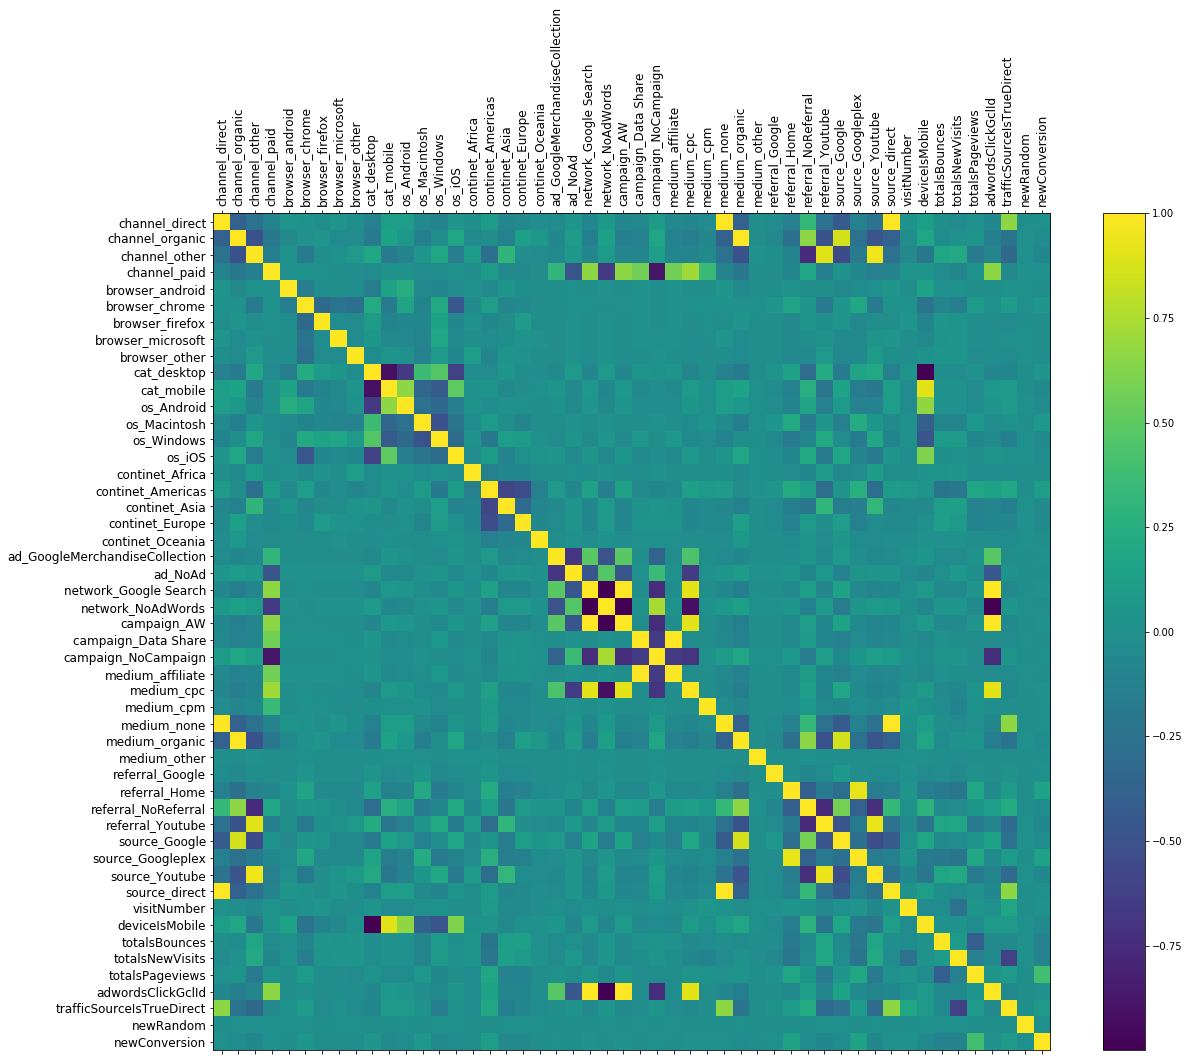

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df5_1.shape[1]), df5_1.columns, fontsize=12, rotation=90)
plt.yticks(range(df5_1.shape[1]), df5_1.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)


The **newConversion** var seems to be mediumly correlated with **totalPageviews**, **referralHome** and Source GooglePlex 

#### Export Oprion 5-1

In [28]:
df5_1.to_csv('data/df5-1.csv', index=False)